In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [4]:
# santec w/o MZI
df_no_MZI = pd.read_csv('Control.csv')

# santec w/ MZI
df_w_MZI = pd.read_csv('Control_MZI_FT_0.csv')

# Name columns 1 time and column 2 amplitude
df_no_MZI.columns = ['time', 'volt']
df_w_MZI.columns = ['time', 'volt']

df_no_MZI = df_no_MZI[1:]
df_w_MZI = df_w_MZI[1:]

In [5]:
df_w_MZI

,time,volt
1,-50.00000E-03,+19.09231E-03
2,-49.95000E-03,+20.47441E-03
3,-49.90000E-03,+21.17096E-03
4,-49.85000E-03,+22.47741E-03
5,-49.80000E-03,+22.95240E-03
...,...,...
1996,+49.75000E-03,+20.02221E-03
1997,+49.80000E-03,+19.92242E-03
1998,+49.85000E-03,+19.13214E-03
1999,+49.90000E-03,+19.51005E-03


In [6]:
df_no_MZI['time'] = df_no_MZI['time'].astype(float)
df_no_MZI['volt'] = df_no_MZI['volt'].astype(float)

df_w_MZI['time'] = df_w_MZI['time'].astype(float)
df_w_MZI['volt'] = df_w_MZI['volt'].astype(float)

In [11]:
df_w_MZI.values[0]

array([-0.05      ,  0.01909231])

In [4]:
len(df_no_MZI['time'])

2000

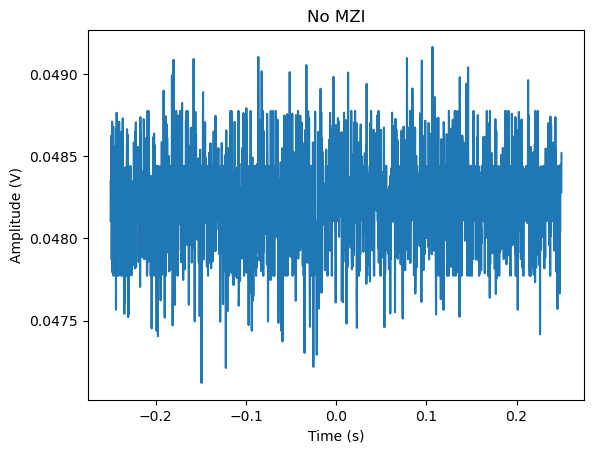

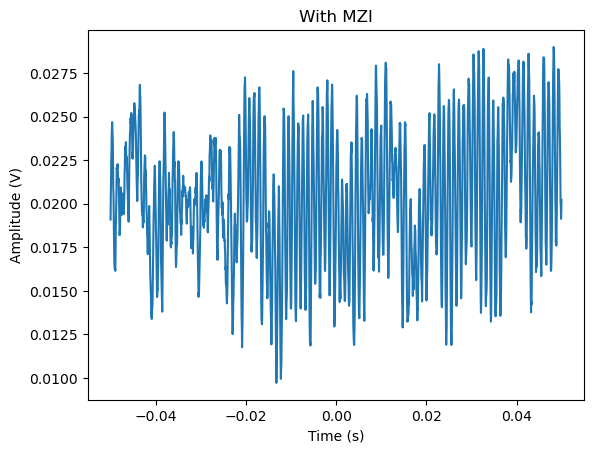

In [5]:
# FFT
fft_data_no_MZI = np.fft.rfft(pd.to_numeric(df_no_MZI['volt'].values))
fft_data_w_MZI = np.fft.rfft(pd.to_numeric(df_w_MZI['volt'].values))

dt = pd.to_numeric(df_w_MZI['time'].values[1]) - pd.to_numeric(df_w_MZI['time'].values[0])

freq = np.fft.rfftfreq(len(df_no_MZI['time']), dt)

# Plot
plt.figure()
plt.plot(pd.to_numeric(df_no_MZI['time'].values), pd.to_numeric(df_no_MZI['volt'].values))
plt.title('No MZI')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()

plt.figure()
plt.plot(pd.to_numeric(df_w_MZI['time'].values), pd.to_numeric(df_w_MZI['volt'].values))
plt.title('With MZI')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()




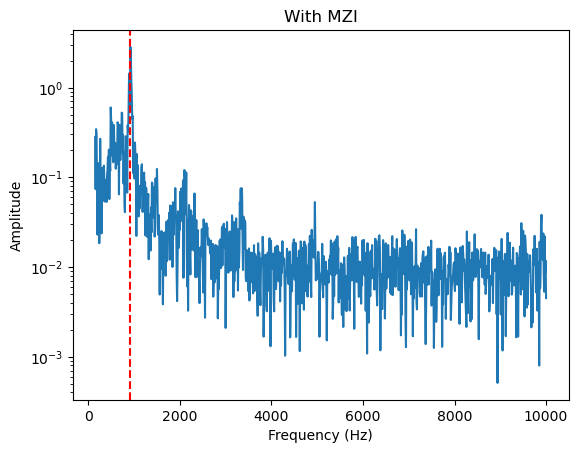

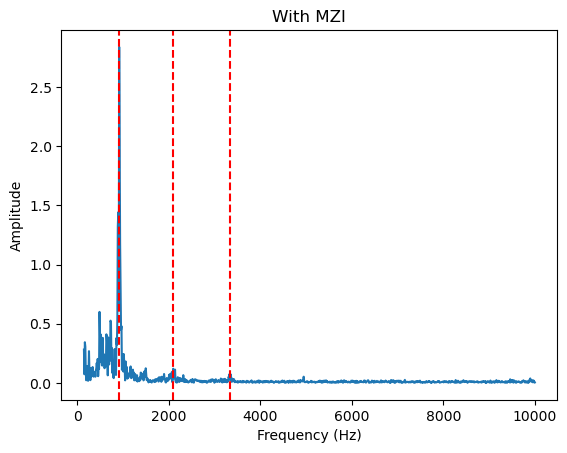

In [6]:
cut_off = 15

# Plot FFT
plt.figure()
plt.semilogy(freq[cut_off:], np.abs(fft_data_w_MZI)[cut_off:])
plt.axvline(920, color='r', linestyle='--')
plt.title('With MZI')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Linear
plt.figure()
plt.plot(freq[cut_off:], np.abs(fft_data_w_MZI)[cut_off:])
plt.axvline(920, color='r', linestyle='--')
plt.axvline(2100, color='r', linestyle='--')
plt.axvline(3350, color='r', linestyle='--')
plt.title('With MZI')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


# Limition of frequency in FFT arises from Nyquist theorem. The sampling rate is 1/dt. The highest frequency that can be resolved is 1/(2*dt) = 1/(2*0.00005) = 10000 Hz

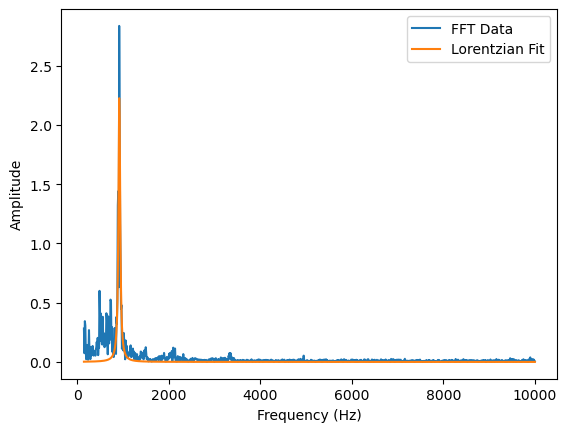

FWHM: 45.39357253569276
Sigma: 16.049051481135887
Center: 922.63476737455


In [8]:
# Truncated data
data = np.abs(fft_data_w_MZI)[cut_off:]
frequency = freq[cut_off:]


# Define the Lorentzian function
def lorentzian(x, x0, gamma, A):
    return A / (1 + ((x - x0) / gamma)**2)

# Fit the Lorentzian function to the FFT data
popt, pcov = curve_fit(lorentzian, frequency, data, p0=(920, 10, 1000))

# Extract the fitted parameters
x0_fit, gamma_fit, A_fit = popt

# Plot the original FFT data and the fitted Lorentzian curve
plt.plot(frequency, data, label='FFT Data')
plt.plot(frequency, lorentzian(frequency, x0_fit, gamma_fit, A_fit), label='Lorentzian Fit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


# Print sigma and FWHM
print('FWHM:', 2 * gamma_fit)
print('Sigma:', gamma_fit / np.sqrt(2))
print('Center:', x0_fit)


In [147]:
params[0]

array([922.63483225,  22.69648943,   2.25618949])